In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.3.1
sys.version_info(major=3, minor=6, micro=7, releaselevel='final', serial=0)
matplotlib 3.3.2
numpy 1.18.4
pandas 1.1.4
sklearn 0.23.2
tensorflow 2.3.1
tensorflow.keras 2.4.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(xtrain_all, ytrain_all), (xtest, ytest) = fashion_mnist.load_data()
xvalid, xtrain = xtrain_all[:5000], xtrain_all[5000:]
yvalid, ytrain = ytrain_all[:5000], ytrain_all[5000:]

print(xvalid.shape, yvalid.shape)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [6]:
print(np.max(xtrain), np.min(xtrain))

255 0


In [3]:
# Normalization
# x = (x - u) / std
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# xtrain [None, 28, 28] => [None, 784]
xtrain_scaled = scaler.fit_transform(
    xtrain.astype(np.float32).reshape(-1, 1)
).reshape(-1, 28, 28)
xvalid_scaled = scaler.transform(
    xvalid.astype(np.float32).reshape(-1, 1)
).reshape(-1, 28, 28)
xtest_scaled = scaler.transform(
    xtest.astype(np.float32).reshape(-1, 1)
).reshape(-1, 28, 28)

In [7]:
print(np.max(xtrain_scaled), np.min(xtrain_scaled))

2.0231433 -0.8105136


In [4]:
# 构建图
# relu: y = max(0, x)
# softmax: 将向量变成概率分布. x = [x1, x2, x3], 
#          y = [e^x1/sum, e^x2/sum, e^x3/sum], sum = e^x1 + e^x2 + e^x3

# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=[28, 28]))
# model.add(keras.layers.Dense(300, activation="relu"))
# model.add(keras.layers.Dense(100, activation="relu"))
# model.add(keras.layers.Dense(10, activation="softmax"))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# reason for sparse: y->index. y->one_hot->[]
# 若 y 已经是一个向量， 直接用 categorical_crossentropy
# 若 y 只是一个数字， 用 sparse_categorical_crossentropy
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.SGD(0.001),
              metrics = ["accuracy"])

In [10]:
history = model.fit(xtrain_scaled, ytrain, epochs=10, 
                    validation_data=(xvalid_scaled, yvalid))

Epoch 1/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.9012 - accuracy: 0.7065 - val_loss: 0.6099 - val_accuracy: 0.7928
Epoch 2/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5706 - accuracy: 0.8032 - val_loss: 0.5186 - val_accuracy: 0.8278
Epoch 3/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5070 - accuracy: 0.8235 - val_loss: 0.4781 - val_accuracy: 0.8352
Epoch 4/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4725 - accuracy: 0.8336 - val_loss: 0.4500 - val_accuracy: 0.8458
Epoch 5/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4493 - accuracy: 0.8418 - val_loss: 0.4361 - val_accuracy: 0.8470
Epoch 6/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4314 - accuracy: 0.8477 - val_loss: 0.4223 - val_accuracy: 0.8544
Epoch 7/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4180 - accuracy: 0.8522 - val_loss: 0.4122 - val_accuracy:

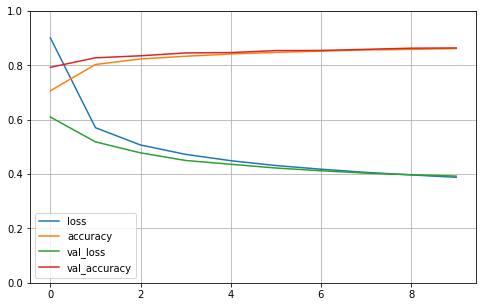

In [12]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

In [13]:
# Loss, accuracy
model.evaluate(xtest_scaled, ytest, verbose=0)

[0.4252517521381378, 0.8492000102996826]